In [148]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

<b>Dataset: </b> https://www.kaggle.com/altavish/boston-housing-dataset

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per dollar 10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - lower status of the population-percentage
* MEDV - Median value of owner-occupied homes in $1000's

In [149]:
house_data = pd.read_csv('datasets/HousingData.csv')

house_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [150]:
#get the shape of the data
house_data.shape

(506, 14)

In [151]:
#get a list of the column names of the data
house_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [152]:
#we are not using CRIM and B, so drop them
#make sure to say that axis = 1 (it means that we are dropping a whole column)
house_data.drop(['CRIM', 'B'], axis=1, inplace=True)

In [153]:
#check for any nulls
house_data.isnull().sum()

ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [154]:
#we found nulls, so let's drop them
house_data.dropna(inplace=True, axis=0)

In [166]:
house_data['above_median'] = np.where(house_data['MEDV'] > house_data['MEDV'].median(), 1, 0)

house_data.sample(10)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,above_median
184,0.0,2.46,0.0,0.4880,5.604,89.8,2.9879,3,193,17.8,13.98,26.4,1
325,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5,287,19.6,5.08,24.6,1
156,0.0,19.58,0.0,0.8710,5.272,94.0,1.7364,5,403,14.7,16.14,13.1,0
463,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24,666,20.2,10.29,20.2,0
434,0.0,18.10,0.0,0.7130,6.208,95.0,2.2222,24,666,20.2,15.17,11.7,0
60,25.0,5.13,0.0,0.4530,5.741,66.2,7.2254,8,284,19.7,13.15,18.7,0
310,0.0,9.90,0.0,0.5440,4.973,37.8,2.5194,4,304,18.4,12.64,16.1,0
64,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3,216,18.6,8.05,33.0,1
170,0.0,19.58,0.0,0.6050,5.875,94.6,2.4259,5,403,14.7,14.43,17.4,0
461,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24,666,20.2,14.65,17.7,0


In [167]:
house_data.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,above_median
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,11.726392,10.944939,0.070218,0.552392,6.292993,68.751332,3.810336,9.535109,408.205811,18.493220,12.651816,22.526392,0.491525
std,23.962227,6.897880,0.255824,0.112717,0.695866,28.008702,2.102197,8.674919,168.898196,2.187476,7.254026,9.263953,0.500535
min,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.000000,5.130000,0.000000,0.449000,5.887000,45.100000,2.106900,4.000000,281.000000,17.400000,6.920000,16.800000,0.000000
50%,0.000000,8.560000,0.000000,0.538000,6.211000,77.700000,3.182700,5.000000,330.000000,19.100000,11.250000,21.200000,0.000000
75%,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.118000,24.000000,666.000000,20.200000,16.960000,25.100000,1.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


### Bivariate data analysis

In [156]:
#pull out these four features to study seperately
house_data_selected = house_data[['MEDV', 'RM', 'DIS', 'AGE']]

house_data_selected.head(10)

,MEDV,RM,DIS,AGE
0,24.0,6.575,4.0900,65.2
1,21.6,6.421,4.9671,78.9
2,34.7,7.185,4.9671,61.1
3,33.4,6.998,6.0622,45.8
5,28.7,6.430,6.0622,58.7
7,27.1,6.172,5.9505,96.1
8,16.5,5.631,6.0821,100.0
10,15.0,6.377,6.3467,94.3
11,18.9,6.009,6.2267,82.9
12,21.7,5.889,5.4509,39.0


Text(0.5, 1.0, 'House Data')

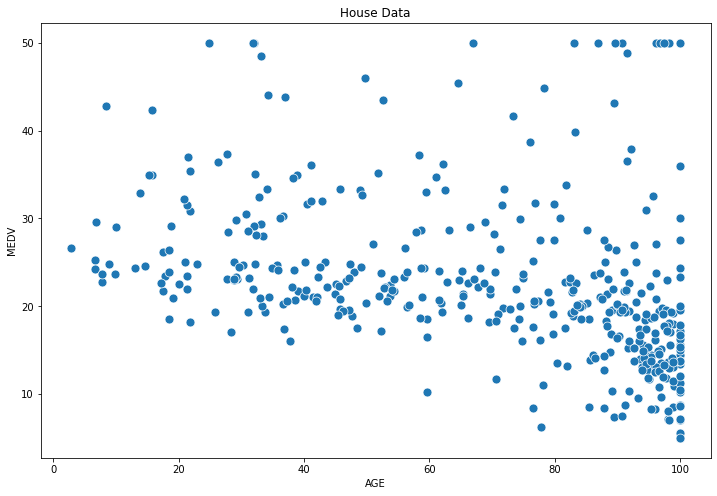

In [157]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='AGE', y='MEDV', s=80, 
                data=house_data_selected)

plt.title('House Data')

Text(0.5, 1.0, 'House Data')

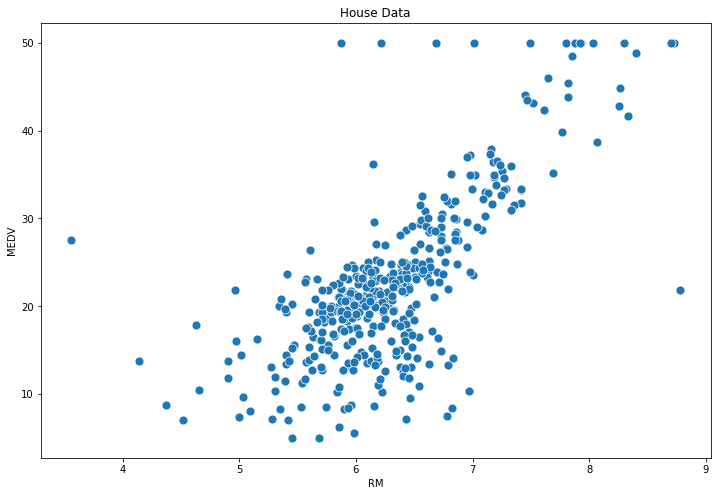

In [158]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='RM', y='MEDV', s=80, 
                data=house_data_selected)

plt.title('House Data')

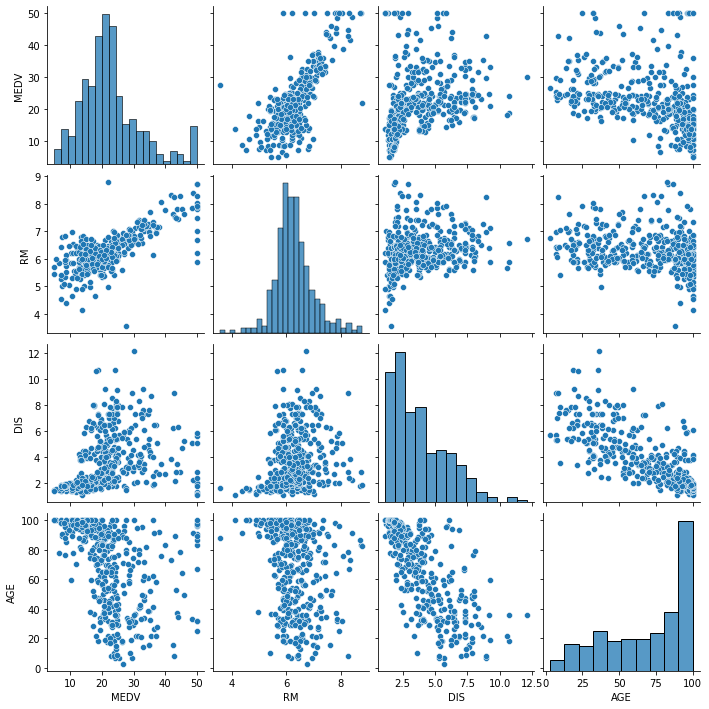

In [159]:
sns.pairplot(house_data_selected)

plt.show()

### Correlation

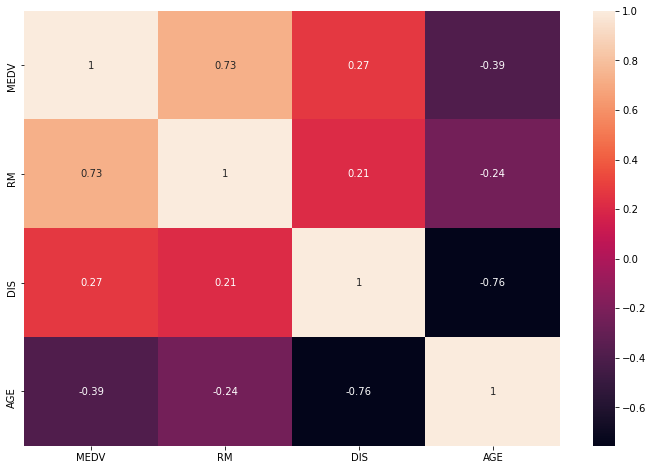

In [160]:
#create a correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(np.corrcoef(house_data_selected.T), 
            xticklabels=house_data_selected.columns, 
            yticklabels=house_data_selected.columns,
            annot=True)

plt.show()

### Linear Regression

Text(0.5, 1.0, 'Salary')

<Figure size 864x576 with 0 Axes>

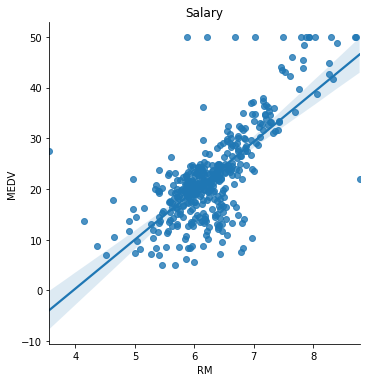

In [161]:
#create a linear regression 
plt.figure(figsize=(12, 8))

sns.lmplot(x='RM', y='MEDV', data=house_data)

plt.title('Salary')

In [162]:
slope, intercept, r_value, _, _ ,= stats.linregress(house_data['RM'], 
                                                    house_data['MEDV'])

In [163]:
print('R-square value\t', r_value**2)
print('Slope\t\t', slope)
print('Intercept\t', intercept)

R-square value	 0.5268665920344618
Slope		 9.663207871720699
Intercept	 -38.284104692129134


# Create an OLS model

In [164]:
#set X and y and then run the OLS model

X = house_data.drop(['MEDV', 'above_median'], axis=1)
y = house_data['MEDV']
reg_model = sm.OLS(y, X).fit()

In [165]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              880.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):                   1.98e-273
Time:                        00:06:45   Log-Likelihood:                         -1239.2
No. Observations:                 413   AIC:                                      2500.
Df Residuals:                     402   BIC:                                      2545.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0497      0.016      3.175      0.002       0.019       0.080
INDUS         -0.0232      0.071     -0.325      0.746      -0.164       0.117
CHAS           4.0215      0.975      4.126      0.000       2.106       5.937
NOX           -1.9100      3.804     -0.502      0.616      -9.388       5.568
RM             6.4556      0.349     18.522      0.000       5.770       7.141
AGE           -0.0149      0.015     -0.968      0.334      -0.045       0.015
DIS           -0.9019      0.212     -4.260      0.000      -1.318      -0.486
RAD            0.0349      0.067      0.519      0.604      -0.097       0.167
TAX           -0.0092      0.004     -2.157      0.032      -0.017      -0.001
PTRATIO       -0.2599      0.118     -2.206      0.028      -0.492      -0.028
LSTAT         -0.3992      0.055     -7.308      0.000      -0.507      -0.292
==============================================================================
Omnibus:                      151.948   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.391
Skew:                           1.426   Prob(JB):                    1.72e-209
Kurtosis:                       9.909   Cond. No.                     7.04e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""